In [1]:
# Task 1 

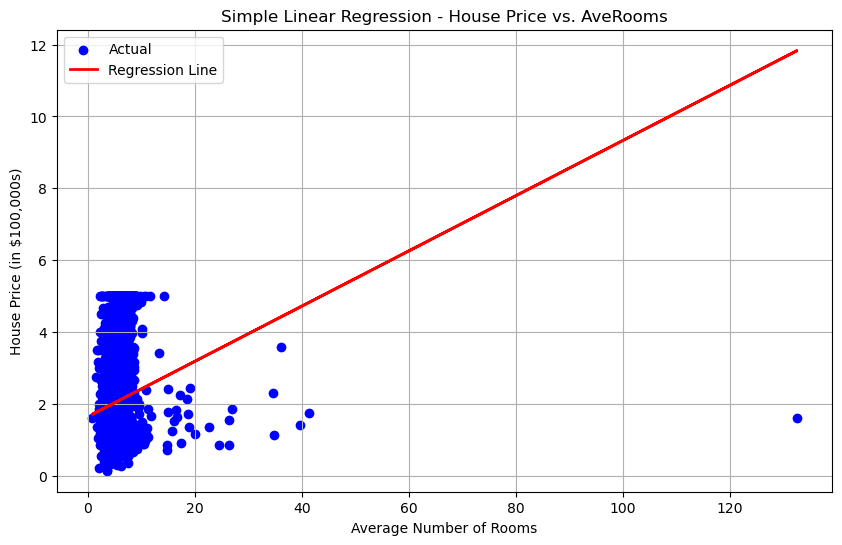

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

feature_index = feature_names.index('AveRooms')
X_single = X[:, [feature_index]] 

X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price (in $100,000s)')
plt.title('Simple Linear Regression - House Price vs. AveRooms')
plt.legend()
plt.grid(True)
plt.show()


Task 2<!--  -->

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np

data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("Feature Coefficients:")
for name, coef in zip(feature_names, model.coef_):
    print(f"{name}: {coef:.4f}")


R-squared: 0.5757877060324526
MSE: 0.555891598695242
RMSE: 0.7455813830127748
Feature Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [9]:
# Task 3

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\nAfter Scaling:")
print("R-squared:", r2_scaled)
print("MSE:", mse_scaled)
print("RMSE:", rmse_scaled)



After Scaling:
R-squared: 0.575787706032451
MSE: 0.5558915986952441
RMSE: 0.7455813830127762


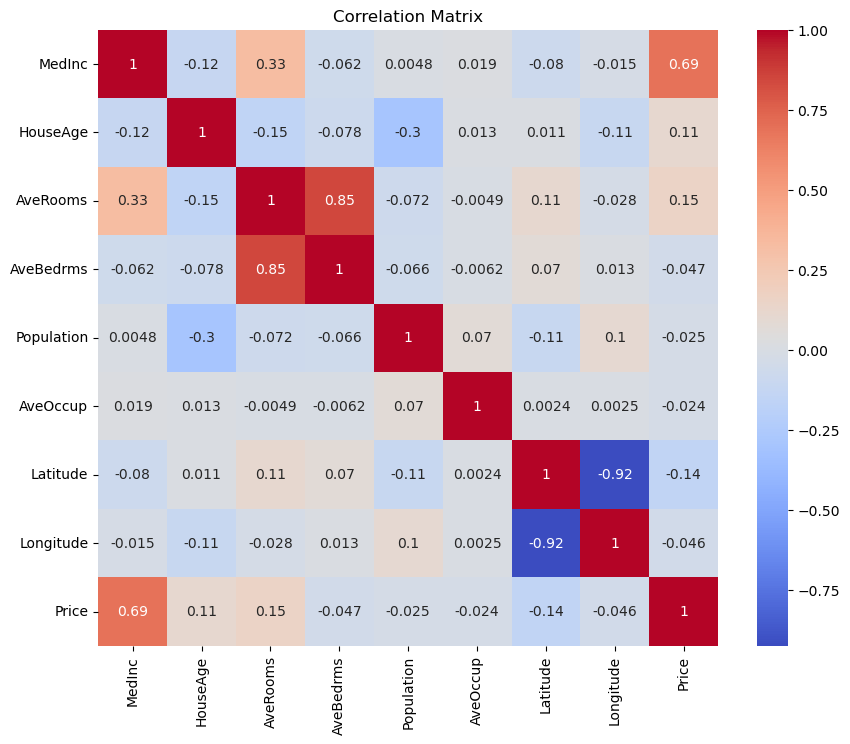


Features with strongest correlation to target:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64

Variance Inflation Factor (VIF):
      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [13]:
# Task 4

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

correlation_with_target = df.corr()['Price'].drop('Price')
print("\nFeatures with strongest correlation to target:")
print(correlation_with_target.sort_values(ascending=False))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns[:-1]
vif_data["VIF"] = [variance_inflation_factor(df.iloc[:, :-1].values, i) for i in range(len(df.columns) - 1)]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Confusion Matrix:
 [[51  3]
 [ 2 87]]
ROC AUC Score: 0.9977111943404078


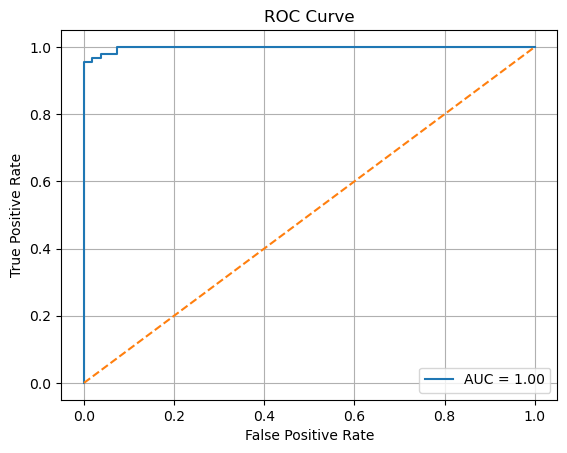

In [15]:
# task 5 

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()




Threshold: 0.3
Confusion Matrix:
 [[50  4]
 [ 2 87]]
F1 Score: 0.9666666666666667

Threshold: 0.5
Confusion Matrix:
 [[51  3]
 [ 2 87]]
F1 Score: 0.9720670391061452

Threshold: 0.7
Confusion Matrix:
 [[53  1]
 [ 3 86]]
F1 Score: 0.9772727272727273
Best Threshold by Youden's J: 0.70


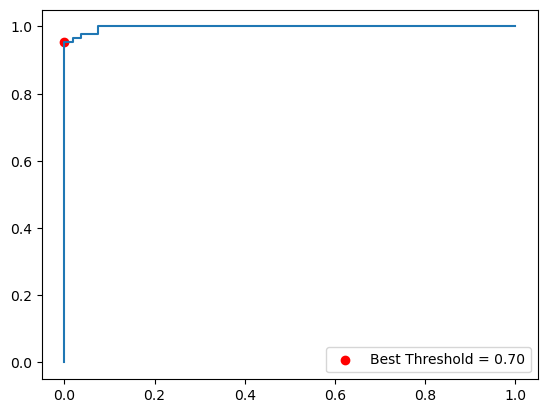

In [17]:
# task 6

from sklearn.metrics import f1_score

thresholds = [0.3, 0.5, 0.7]
for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    print(f"\nThreshold: {t}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
    print("F1 Score:", f1_score(y_test, y_pred_thresh))
j_scores = tpr - fpr
j_best = np.argmax(j_scores)
best_threshold = thresholds[j_best]

print(f"Best Threshold by Youden's J: {thresholds[j_best]:.2f}")
plt.plot(fpr, tpr)
plt.scatter(fpr[j_best], tpr[j_best], color='red', label=f'Best Threshold = {thresholds[j_best]:.2f}')
plt.legend()
plt.show()





In [19]:
# 1. What are the assumptions of linear regression?
# ANSwer:  Linear regression assumes:

# Linearity: A linear relationship exists between the independent and dependent variables.

# Independence: Observations are independent of each other.

# 2. When should you use logistic regression instead of linear regression?
# ANSwer : Logistic regression is used when the target variable is categorical, especially for binary classification (e.g., spam vs. not spam, disease vs. no disease). Use logistic regression when you need to model probabilities and predict class membership rather than continuous values.

# 3. What is the interpretation of coefficients in logistic regression?
# Answer: In logistic regression, coefficients represent the log-odds of the target being in the positive class. A positive coefficient increases the log-odds (and thus the probability), while a negative coefficient decreases it. Exponentiating the coefficient gives the odds ratio, which shows how a unit change in a feature affects the odds.

# 4. What is the difference between sigmoid and softmax functions?
# Answer: The sigmoid function outputs a value between 0 and 1 and is used in binary classification to represent the probability of the positive class.

# The softmax function generalizes sigmoid for multiclass classification, outputting a probability distribution over all classes (values add up to 1).

# 5. Why is R-squared not suitable for evaluating logistic regression models?
# Answer: R-squared measures the proportion of variance explained in a continuous outcome, which is not meaningful for classification. Logistic regression predicts probabilities, not actual values, so we use metrics like accuracy, precision, recall, F1-score, and ROC-AUC instead of R-squared.